In [ ]:
from run import Model
from mmengine import Config
import torch
from matplotlib import pyplot as plt
import numpy as np
import torchvision

In [ ]:
device = 'mps'
model = Model(Config.fromfile('07-14-24/16:57:15-[gen-models]-[sde-flower]/config.py'))
model.load_state_dict(torch.load('07-14-24/16:57:15-[gen-models]-[sde-flower]/last.ckpt', map_location='cpu')['state_dict'])
model.to(device)
model.eval()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.31246245..1.198311].


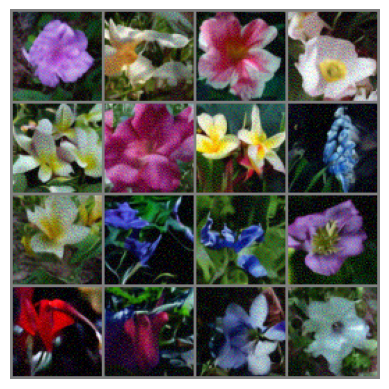

In [5]:
sampled = model.model.sample(b_s=16, sample_size=64, device=device)
img = torchvision.utils.make_grid(sampled, nrow=4)
plt.imshow((img.permute(1, 2, 0).cpu().numpy() + 1.0) / 2.0)
plt.axis('off')
plt.show()